In [1]:
from models.model2 import CES
import numpy as np
from src.graph import draw_graph
from models.model2 import linear_multiplicative_cooling

In [3]:
ces = CES(
    cooling_operator= linear_multiplicative_cooling(t_max= 100, alpha= 0.8), 
    step_max = 100, 
    t_min= 0, 
    t_max= 100, 
    ChromSize = 11
)

In [4]:
x0 = ces.nearestNeighborHeuristic(11)

In [6]:
r0 ,df = ces.decoding(x0, summary=True)

In [7]:
df

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,6,61.131007,1.528275,0,7,14.277890,0.722110
1,0,6,11,64.938432,1.623461,5,14,13.510805,0.767085
2,0,11,7,18.681542,0.467039,0,24,13.290129,0.220676
3,0,7,8,15.000000,0.375000,0,24,13.112942,0.177187
4,0,8,1,37.336309,0.933408,7,24,12.671906,0.441035
5,0,1,0,17.492856,0.437321,4,15,12.465272,0.206634
6,1,0,3,89.442719,2.236068,0,7,13.943458,1.056542
7,1,3,4,3.162278,0.079057,7,24,13.906103,0.037354
8,1,4,5,36.013886,0.900347,7,24,13.480689,0.425414
9,1,5,9,17.029386,0.425735,0,24,13.279530,0.201160


In [8]:
ces.objective_function(x0)

20.54841979183568

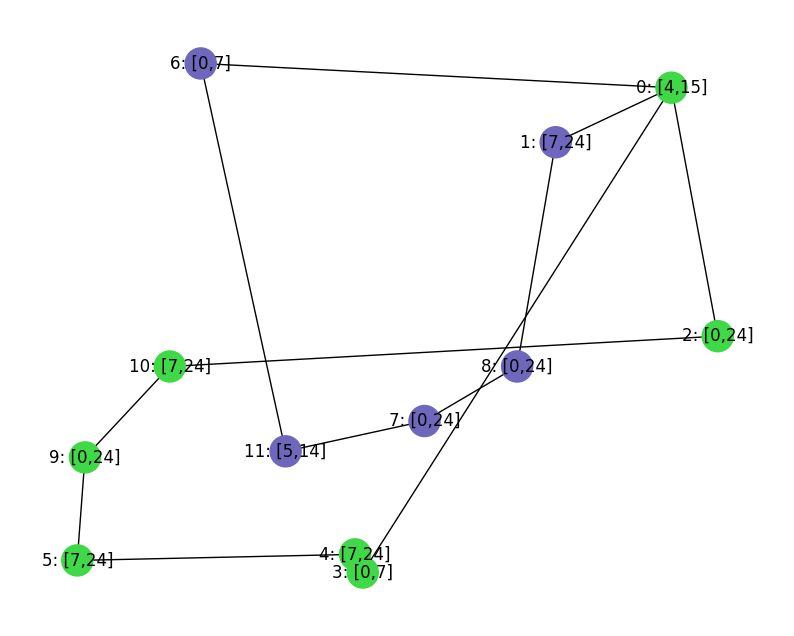

In [9]:
draw_graph(r0)

In [10]:
ces.climatic_evolutionary_search(50,11,2,8,20)

True
3
9
[ 6. 10.  7.]
[11.  9.  5.  4.  3.  1.  8.]
[2.]
2


In [11]:
ces.step

2

In [12]:
ces.draw_energy_plot()

array([ 6., 10.,  7.,  8.,  1.,  3.,  4.,  5.,  9., 11.,  2.])

In [13]:
ces.x_best.astype(int)

array([ 6, 10,  7,  8,  1,  3,  4,  5,  9, 11,  2])

In [14]:
r, df = ces.decoding(ces.x_best.astype(int), summary=True)

In [15]:
ces.objective_function(ces.x_best.astype(int))

20.38630357624476

In [16]:
r

{0: [[0, 0], [6, 0], [10, 0], [7, 0], [8, 0], [1, 0], [0, 0]],
 1: [[0, 1], [3, 1], [4, 1], [5, 1], [9, 1], [11, 1], [2, 1], [0, 1]]}

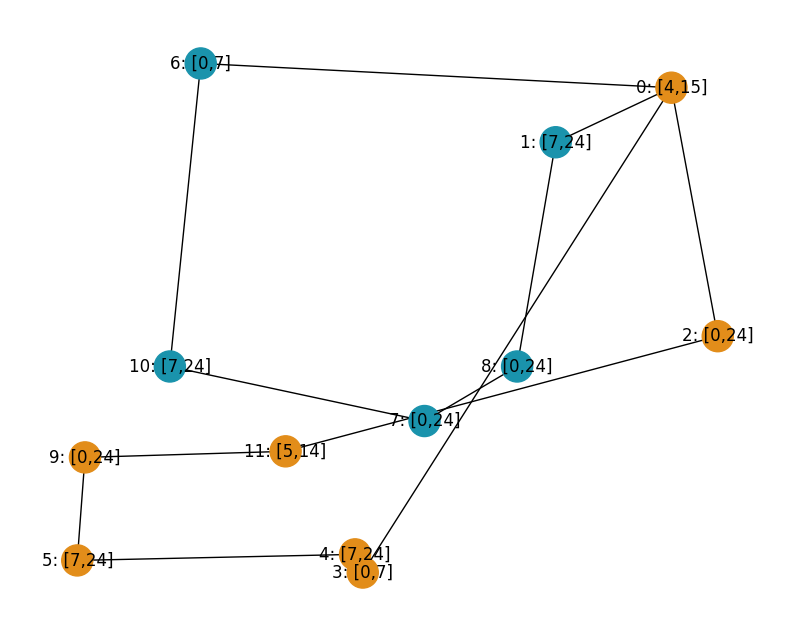

In [17]:

draw_graph(r)

In [17]:

A = [7,3,4,11,10,9,5,2,8,1,6]


r, df = ces.decoding(np.array(A), summary=True)

#6.  8.  2.  1.  3.  4.  5.  9. 10. 11.  7.
#6.  1.  8.  2.  3.  4. 10.  9.  5. 11.  7.
#3.  5.  9. 10. 11.  4.  7.  6.  8.  2.  1.
#[ 3.  4.  5.  9. 11.  8.  1.  6. 10.  7.  2.]

#[ 2.  3.  4.  7.  1.  6. 10.  5.  9. 11.  8.]

In [18]:
ces.objective_function(np.array(A))

21.86940447462119

In [19]:
df

,Vehiculo,Nodoi-1,Nodoi,Distancia,TiempoArco,TW_A,TW_B,Tanque,CO2
0,0,0,7,63.631753,1.590794,0,24,14.248350,0.751650
1,0,7,3,26.248809,0.656220,0,7,13.938286,0.310064
2,0,3,4,3.162278,0.079057,7,24,13.900931,0.037354
3,0,4,11,19.235384,0.480885,5,14,13.673713,0.227218
4,0,11,10,20.518285,0.512957,7,24,13.431341,0.242372
5,0,10,9,18.601075,0.465027,0,24,13.211616,0.219725
6,0,9,5,17.029386,0.425735,7,24,13.010456,0.201160
7,0,5,0,109.603832,2.740096,4,15,11.715761,1.294695
8,1,0,2,41.436699,1.035917,0,24,14.510529,0.489471
9,1,2,8,26.476405,0.661910,0,24,14.197776,0.312753


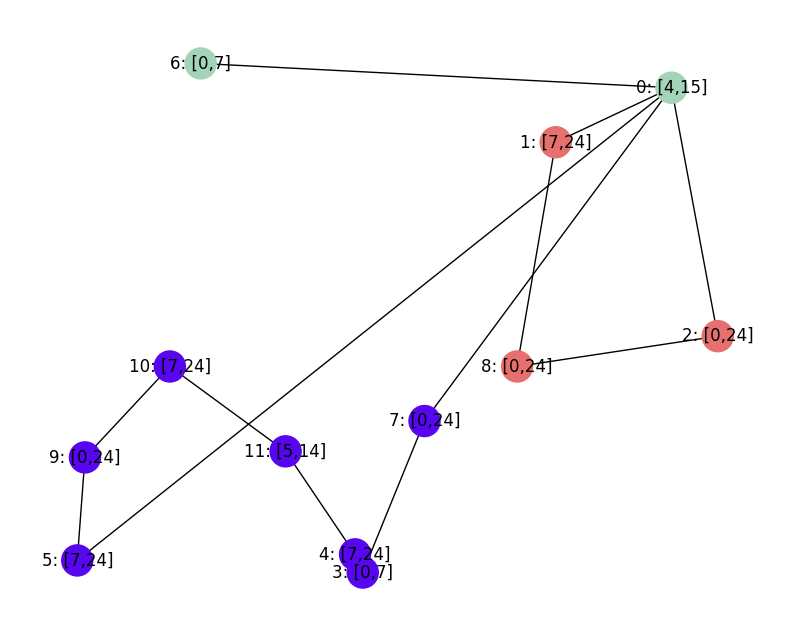

In [20]:
draw_graph(r)

In [19]:
r

{0: [[0, 0], [6, 0], [8, 0], [2, 0], [1, 0], [0, 0]],
 1: [[0, 1], [3, 1], [4, 1], [5, 1], [9, 1], [10, 1], [11, 1], [7, 1], [0, 1]]}

In [34]:
import numpy as np

In [808]:
def scrambledSubstring(chromosome_i: np.ndarray):
    chromosome = chromosome_i.copy()
    a = np.random.randint(0, chromosome.shape[0])
    b = np.random.randint(0, chromosome.shape[0])

    while True:
        b = np.random.randint(0, chromosome.shape[0])
        if a != b:
            break
    x = chromosome[a:b].copy()        
    np.random.shuffle(x)
    chromosome[a:b] = x
    return chromosome

In [576]:
def insertion(chromosome_i: np.ndarray):
    x = chromosome_i.copy()
    n = np.random.randint(1, x.shape[0]-2)
    m = np.random.randint(1, x.shape[0])

    while True:
        m = np.random.randint(0, x.shape[0])
        if  m > n:
            break
    return np.concatenate((x[:n],x[n+1:m],np.array([x[n]]),x[m:]))

In [578]:
def reverseSubstring(chromosome_i: np.ndarray):
    x = chromosome_i.copy()
    n = np.random.randint(1, x.shape[0]-2)
    m = np.random.randint(1, x.shape[0])

    while True:
        m = np.random.randint(n+1, x.shape[0])
        if  m > n:
            break
    print(n)
    print(m)
    print(x[:n])
    print(x[m:n-1:-1])
    print(x[m+1:])
    return np.concatenate((x[:n],x[m:n-1:-1] ,x[m+1:]))

In [579]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

In [851]:
scrambledSubstring(x)

array([ 1,  2,  3,  4,  5,  7,  9,  8,  6, 10])

In [258]:
n = 4
m = 8


np.concatenate((x[:n],x[m:n-1:-1] ,x[m+1:]))

array([ 1,  2,  3,  4,  9,  8,  7,  6,  5, 10])

In [202]:
scrambledSubstring(x)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])